# Принятие решений в бизнесе.

# Целью проекта является увеличение выручки компании за счет нововведений, в связи с чем принято решение о запуске А/В теста.

# Основные задачи: 1) Приоритизация гипотез; 2) Анализ A/B-теста

# В ходе дальнейшей работы с данными необходимо приоритизировать гипотезы, запустить A/B-тест, проанализировать результаты и сделать необходимые выводы. Работа разбита на 3 части с подпунктами по каждому блоку.

## Изучение датафрейма

In [1]:
import pandas as pd
import datetime as dt
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
import warnings 
register_matplotlib_converters()
plt.rcParams["figure.figsize"] = (15,5)

In [2]:
df_1 = pd.read_csv('/datasets/hypothesis.csv')
df_1.columns = df_1.columns.str.lower()
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   hypothesis  9 non-null      object
 1   reach       9 non-null      int64 
 2   impact      9 non-null      int64 
 3   confidence  9 non-null      int64 
 4   efforts     9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes


In [3]:
df_1.duplicated().sum()

0

Явные дубликаты в датафрейме отсутсвуют, наименования в дата фрейме "hypothesis" были приведены к нижнему регистру для моего удобства

## Приоритизация гипотез

### Применим способ приоритизация ICE и отсортируем по убавнию приоритизации

In [4]:
pd.options.display.max_colwidth = 150
df_1['ice'] = df_1['impact'] * df_1['confidence']/ df_1['efforts']
df_1['ice'] = df_1['ice'].round(2)
df_1.sort_values(by = 'ice', ascending=False)

,hypothesis,reach,impact,confidence,efforts,ice
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5,16.20
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6,13.33
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5,11.20
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3,8.00
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3,7.00
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10,2.00
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3,1.33
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8,1.12
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1,1.00


### Применим способ приоритизация RICE и отсортируем по убавнию приоритизации

In [5]:
df_1['rice'] = df_1['reach'] * df_1['impact'] * df_1['confidence']/ df_1['efforts']
df_1.sort_values(by = 'rice', ascending=False)

,hypothesis,reach,impact,confidence,efforts,ice,rice
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5,11.20,112.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3,7.00,56.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6,13.33,40.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3,8.00,40.0
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5,16.20,16.2
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8,1.12,9.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10,2.00,4.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3,1.33,4.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1,1.00,3.0


### Разница между ICE и RICE

Наиболее перспективные гепотезы по методу ICE являются гепотезы с индексом 8, 0, 7, 6. По методу RICE гепотезы с индексом 7, 2, 0, 6. Охват пользователей повлиял на лидера гепотезы.

Важный фактор, который повлиял на изменения приоритизации - уровень охвата. Он измеряется количеством людей/событий за определенный период времени. Этот фактор предназначен для оценки того, на какое количество людей каждая фича повлияет в течение определенного количества времени, а также какое количество пользователей увидят такие изменения. Именно из-за параметра Reach (который используется в методе RICE) появились изменения в приоритизации. 

## Анализ A/B-теста

### Построение графика кумулятивной выручки по группам

In [6]:
orders = pd.read_csv('/datasets/orders.csv', sep=',')
orders['date'] = orders['date'].map(
    lambda x: dt.datetime.strptime(x, '%Y-%m-%d')
)

visitors = pd.read_csv('/datasets/visitors.csv', sep=',')
visitors['date'] = visitors['date'].map(
    lambda x: dt.datetime.strptime(x, '%Y-%m-%d')
)


Привели даты в датафреймах в подходящий формат

In [7]:
display(orders.isna().sum())
display(visitors.isna().sum())


transactionId    0
visitorId        0
date             0
revenue          0
group            0
dtype: int64

date        0
group       0
visitors    0
dtype: int64

Пропущенный значения в датафреймах отсутсвуют

In [8]:
print('Дата начала теста:', orders['date'].sort_values().head(1))
print('Дата конца теста:', orders['date'].sort_values().tail(1))

Дата начала теста: 168   2019-08-01
Name: date, dtype: datetime64[ns]
Дата конца теста: 959   2019-08-31
Name: date, dtype: datetime64[ns]


Вывели даты начала и конца теста

In [9]:
orders.groupby('group').nunique('visitorId')['visitorId']

group
A    503
B    586
Name: visitorId, dtype: int64

Посмотрели количество уникальные пользователей по группам

Было проверено количетсво пользователей в каждой группе и заодно количество групп, а также дубликаты в группах. Общее количество дубликатов = 9% - по моему мнению это слишком много для удаления, так как максимальный порог, который не повлияет на результат - 5%, с другой стороны дубликаты повлияют на результат теста (он будет не корректен). Учитывая изложенное я принял решение удалить дубликаты для более правдивого анализа А/В теста. Также обнаружено, что количество пользователей в группе В на 83 пользователя больше (на 7,6%), что кажется многовато (в идеале лучше было бы чтобы их было поровну)


In [10]:
orders.groupby('visitorId').agg({'group': 'nunique'}).query('group>1').count()

group    58
dtype: int64

Нашли количество задублированных пользователей в обеих группах

In [11]:
double = orders.groupby('visitorId').agg({'group': 'nunique'}).query('group>1').reset_index()
double

,visitorId,group
0,8300375,2
1,199603092,2
2,232979603,2
3,237748145,2
4,276558944,2
5,351125977,2
6,393266494,2
7,457167155,2
8,471551937,2
9,477780734,2


In [12]:
orders = orders[~orders['visitorId'].isin(double['visitorId'])]

Удалили дубликаты из датафрейма

In [13]:
orders.groupby('visitorId').agg({'group': 'nunique'}).query('group>1').count()

group    0
dtype: int64

Проверили, что дубликаты отсутсвуют

In [14]:


datesGroups = orders[['date', 'group']].drop_duplicates()

ordersAggregated = datesGroups.apply(
    lambda x: orders[
        np.logical_and(
            orders['date'] <= x['date'], orders['group'] == x['group']
        )
    ].agg(
        {
            'date': 'max',
            'group': 'max',
            'transactionId': 'nunique',
            'visitorId': 'nunique',
            'revenue': 'sum',
        }
    ),
    axis=1,
).sort_values(by=['date', 'group'])

visitorsAggregated = datesGroups.apply(
    lambda x: visitors[
        np.logical_and(
            visitors['date'] <= x['date'], visitors['group'] == x['group']
        )
    ].agg({'date': 'max', 'group': 'max', 'visitors': 'sum'}),
    axis=1,
).sort_values(by=['date', 'group'])

cumulativeData = ordersAggregated.merge(
    visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group']
)
cumulativeData.columns = [
    'date',
    'group',
    'orders',
    'buyers',
    'revenue',
    'visitors',
]

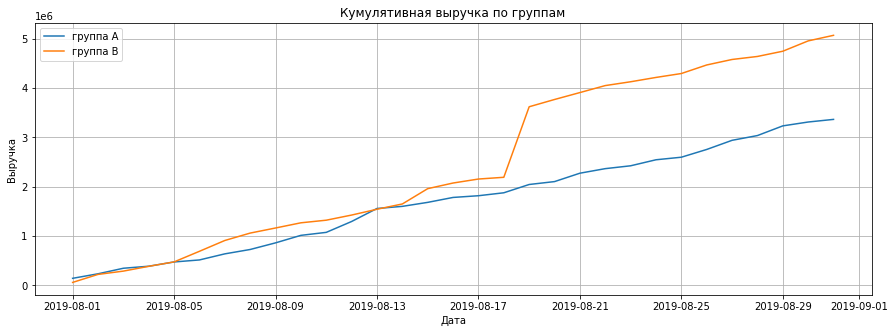

In [15]:
cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date','revenue', 'orders']]

cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date','revenue', 'orders']]

plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='группа A')

plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='группа B')
plt.title('Кумулятивная выручка по группам')
plt.xlabel('Дата')
plt.ylabel('Выручка')
plt.grid()
plt.legend();

Группа А стабильно хуже по накопленным показателям, чем группа В. У группы В в середине теста произошел скачек, возможно в данных есть аномалии

### Построение графика кумулятивного среднего чека по группам

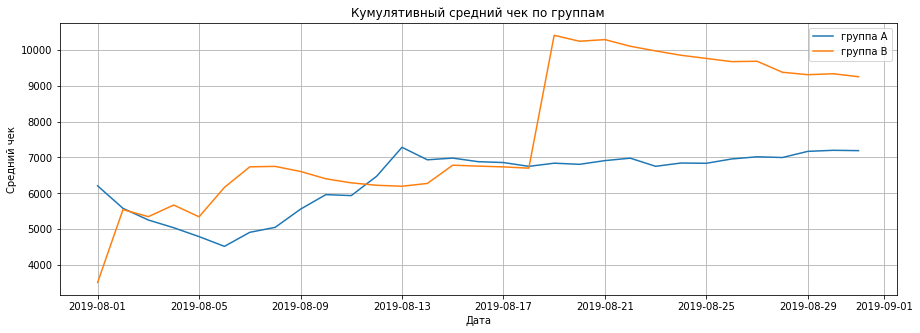

In [16]:
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label='группа A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label='группа B')
plt.title('Кумулятивный средний чек по группам')
plt.xlabel('Дата')
plt.ylabel('Средний чек')
plt.grid()
plt.legend();

Примерно в одинаковых числах в обеих группах провал в среднем чеке, а затем, средний чек группы В резко вырастает, в то время как группа А немного идет на временный спад, но можно заметить, что в дальнешем у группы В начинается спад после сскачка, а у группы А начинается подъем. Требуется дополнительный анализ выбросов.

### Построение графика относительного изменения кумулятивного среднего чека группы B к группе A

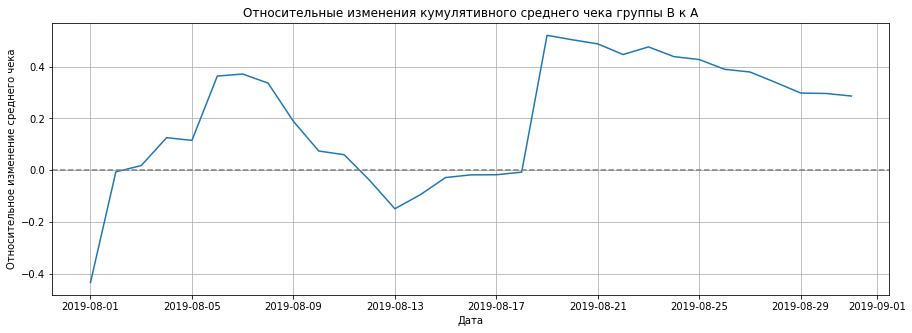

In [17]:
mergedCumulativeRevenue = cumulativeRevenueA.merge(cumulativeRevenueB, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

plt.plot(mergedCumulativeRevenue['date'], (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])/(mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1)
plt.title('Относительные изменения кумулятивного среднего чека группы В к А')
plt.xlabel('Дата')
plt.ylabel('Относительное изменение среднего чека')
plt.grid()
plt.axhline(y=0, color='grey', linestyle='--');


Результаты теста резко менялись в некоторые даты, предположительно тогда и были совершены аномальные заказы

### Построение графика кумулятивного среднего количества заказов на посетителя по группам.

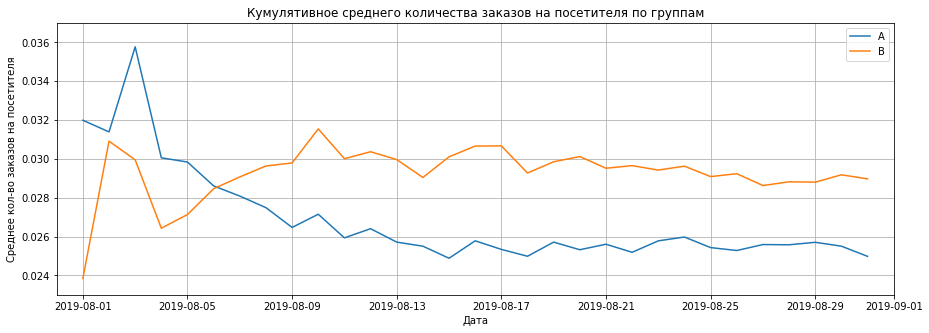

In [18]:
cumulativeData['order_visitor'] = (
    cumulativeData['orders'] / cumulativeData['visitors']
)
cumulativeDataA = cumulativeData[cumulativeData['group']=='A']
cumulativeDataB = cumulativeData[cumulativeData['group']=='B']
plt.plot(cumulativeDataA['date'], cumulativeDataA['orders']/cumulativeDataA['visitors'], label='A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['orders']/cumulativeDataB['visitors'], label='B')
plt.title('Кумулятивное среднего количества заказов на посетителя по группам')
plt.xlabel('Дата')
plt.ylabel('Среднее кол-во заказов на посетителя')
plt.grid()
plt.legend()
plt.axis([dt.datetime(2019, 7, 31), dt.datetime(2019, 9, 1), 0.023, 0.037]);

Можно заметить, что среднее количество заказов на посетителя в первые дни колебалось, но затем показатели стали стабилизироваться. Среднее количество заказов на посетителя в группе В явно больше  

### Построение графика относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A

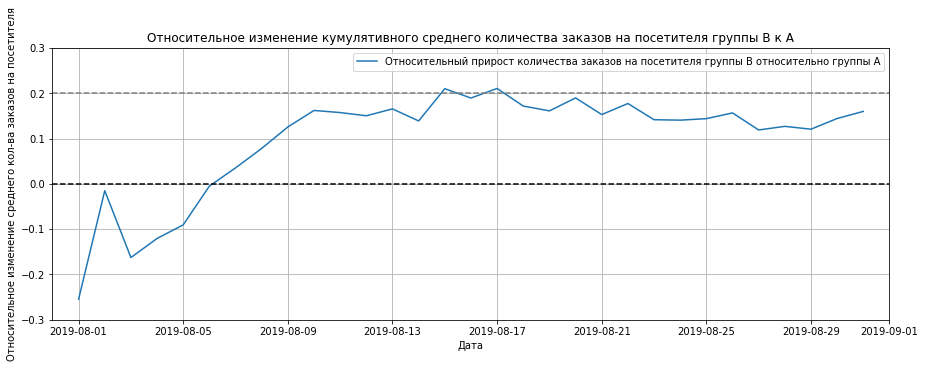

In [19]:
mergedCumulativeData = cumulativeDataA[['date','order_visitor']].merge(cumulativeDataB[['date','order_visitor']], left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

plt.plot(mergedCumulativeData['date'], mergedCumulativeData['order_visitorB']/mergedCumulativeData['order_visitorA']-1, label="Относительный прирост количества заказов на посетителя группы B относительно группы A")
plt.title('Относительное изменение кумулятивного среднего количества заказов на посетителя группы В к А')
plt.xlabel('Дата')
plt.ylabel('Относительное изменение среднего кол-ва заказов на посетителя')
plt.grid()
plt.legend()

plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=0.2, color='grey', linestyle='--')
plt.axis(["2019-07-31", '2019-09-01', -0.3, 0.3]);

Из графика следует, что почти с самого начала теста у поситеителей группы В среднее количество заказов больше, чем у группы А от 10% до 20%

### Построение точечного графика количества заказов по пользователям

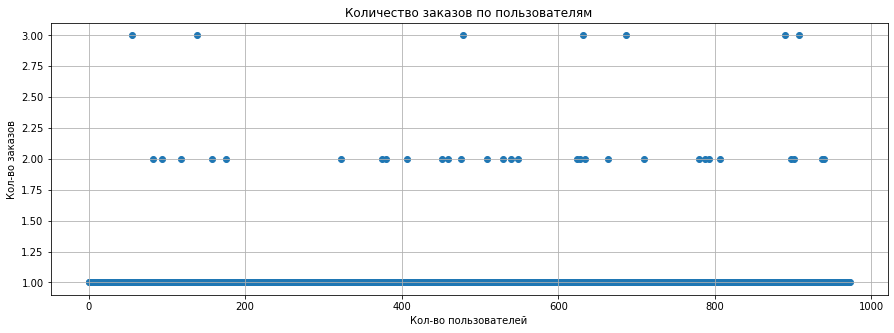

In [20]:
ordersByUsers = (
    orders.groupby('visitorId', as_index=False)
    .agg({'transactionId': 'nunique'})
)
ordersByUsers.columns = ['userId', 'orders']

plt.grid()
plt.title('Количество заказов по пользователям')
plt.xlabel('Кол-во пользователей')
plt.ylabel('Кол-во заказов')

x_values = pd.Series(range(0, len(ordersByUsers)))
plt.scatter(x_values, ordersByUsers['orders']); 

По графику можно заметить, что сновное количество заказов - 1, чуть меньше 2 и совсем мало 3. Необходимо откинуть аномалии (от 1% до 5%)

### Посчитаем 95-й и 99-й перцентили количества заказов на пользователя

In [21]:
print('90, 95 и 99 перцентили стоимости заказов:', np.percentile(ordersByUsers['orders'],[90,95,99]))

90, 95 и 99 перцентили стоимости заказов: [1. 1. 2.]


1 закза совершали не более 5% пользователей и 2 заказ не более 1%. Примем количество заказов равное 2 как границу для фильтрации.

### Построение точечного графика стоимостей заказов

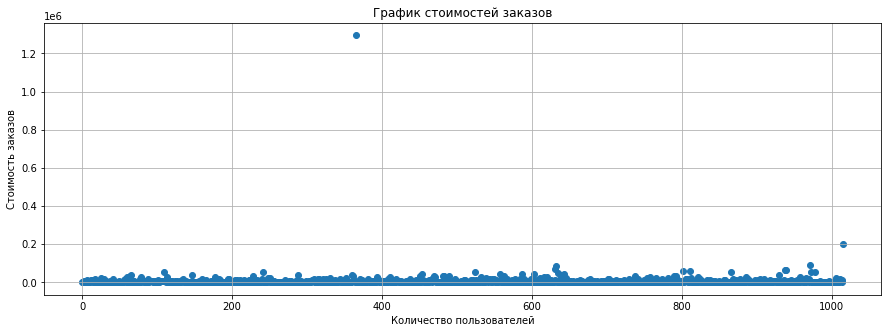

In [22]:
RevenueByUsers = pd.Series(range(0, len(orders['revenue'])))
plt.grid()
plt.title('График стоимостей заказов')
plt.xlabel('Количество пользователей')
plt.ylabel('Стоимость заказов')

plt.scatter(RevenueByUsers, orders['revenue']);

В среднем стоимость заказов не превышает 200 000р, есть пару выбросов ( около 200 тыс. и 1,2 млн.). Посчитаем выборочные процентили.

In [23]:
orders['revenue'].sort_values(ascending=False).head()

425     1294500
1196     202740
1136      92550
744       86620
743       67990
Name: revenue, dtype: int64

Для построения более информативного графика посмотрим точные суммы аномальных заказов

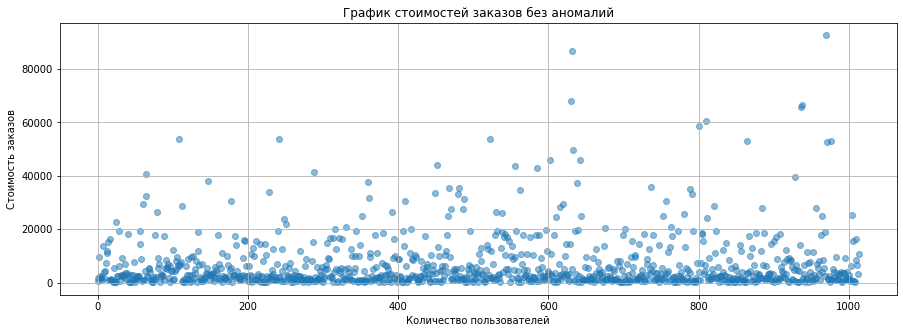

In [24]:
result = orders[orders['revenue']<=202000]['revenue']
xn_values = pd.Series(range(0,len(result)))

plt.grid()
plt.title('График стоимостей заказов без аномалий')
plt.xlabel('Количество пользователей')
plt.ylabel('Стоимость заказов')
plt.scatter(xn_values, result, alpha=0.5);

По графику видно, что основная стоимоть заказов составляет 20 000 и менее

### Посчитаем 95-й и 99-й перцентили стоимости заказов

In [25]:
print('90, 95 и 99 перцентили стоимости заказов:', np.percentile(orders['revenue'],[90,95,99]))

90, 95 и 99 перцентили стоимости заказов: [17990. 26785. 53904.]


99% заказов меньше стоимости 53 904, определим это значение как границу

### Посчитаем статистическую значимость различий в среднем количестве заказов на посетителя между группами по «сырым» данным

Сформулируем гипотезы. 

Нулевая: различий в среднем количестве заказов на посетителя между группами нет. 

Альтернативная: различия в среднем количестве заказов на посетителя между группами есть.

Для проверки предположения о нормальности распределения данных используем критерий Манна-Уитни, так как в данных, как мы уже заметили, есть выбросы, а иные методы существенно повлияют на результат

In [26]:
ordersByUsersA = (
    orders[orders['group'] == 'A']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersA.columns = ['userId', 'orders']

ordersByUsersB = (
    orders[orders['group'] == 'B']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersB.columns = ['userId', 'orders'] 

sampleA = pd.concat([ordersByUsersA['orders'],pd.Series(0, index=np.arange(visitors[visitors['group'] == 'A']['visitors'].sum() - len(ordersByUsersA['orders'])), name='orders')],axis=0)

sampleB = pd.concat([ordersByUsersB['orders'],pd.Series(0, index=np.arange(visitors[visitors['group'] == 'B']['visitors'].sum() - len(ordersByUsersB['orders'])), name='orders')],axis=0)

ordersByUsersA = (
    orders[orders['group'] == 'A']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersA.columns = ['userId', 'orders']

ordersByUsersB = (
    orders[orders['group'] == 'B']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersB.columns = ['userId', 'orders']

sampleA = pd.concat(
    [
        ordersByUsersA['orders'],
        pd.Series(
            0,
            index=np.arange(
                visitors[visitors['group'] == 'A']['visitors'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleB = pd.concat(
    [
        ordersByUsersB['orders'],
        pd.Series(
            0,
            index=np.arange(
                visitors[visitors['group'] == 'B']['visitors'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

print('Значение P-value:', "{0:.3f}".format(stats.mannwhitneyu(sampleA, sampleB)[1]))


print('Относительная разница между группами:',"{0:.3f}".format((sampleB.mean()/sampleA.mean()-1)))


                                 



Значение P-value: 0.011
Относительная разница между группами: 0.160


P-value меньше 0.05 значит нулевую гепотезу отвергаем, статистически значимые отличие есть, относительный прирост среднего группы В к группе А равен 13,3%.

### Посчитаем статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным

In [27]:
print('Значение P-value:','{0:.3f}'.format(stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])[1]))
print('Относительная разница между группами:','{0:.3f}'.format(orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1))

Значение P-value: 0.829
Относительная разница между группами: 0.287


P-value больше 0.05 - статистически значимых отличий между группамми в среднем чеке нет, однако относительный прирост среднего чека группы В к А равен 28,7%.

### Посчитаем статистическую значимость различий в среднем количестве заказов на посетителя между группами по «очищенным» данным

In [28]:
usersWithManyOrders = pd.concat(
    [
        ordersByUsersA[ordersByUsersA['orders'] > np.percentile(ordersByUsers['orders'], 99)]['userId'],
        ordersByUsersB[ordersByUsersB['orders'] > np.percentile(ordersByUsers['orders'], 99)]['userId'],
    ],
    axis=0,
)
usersWithExpensiveOrders = orders[orders['revenue'] > 53904]['visitorId']
abnormalUsers = (
    pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis=0)
    .drop_duplicates()
    .sort_values()
)
print('Абсолютные потери(количество аномальных пользователей):' ,len(abnormalUsers)) 
print('Относительные потери:', round(len(abnormalUsers)/orders['visitorId'].nunique(),3))

Абсолютные потери(количество аномальных пользователей): 16
Относительные потери: 0.016


In [29]:
sampleAFiltered = pd.concat(
    [
        ordersByUsersA[
            np.logical_not(ordersByUsersA['userId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                visitors[visitors['group'] == 'A']['visitors'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleBFiltered = pd.concat(
    [
        ordersByUsersB[
            np.logical_not(ordersByUsersB['userId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                visitors[visitors['group'] == 'B']['visitors'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)
print('Значение P-value:','{0:.3f}'.format(stats.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]))
print('Относительная разница между группами:','{0:.3f}'.format(sampleBFiltered.mean()/sampleAFiltered.mean()-1))

Значение P-value: 0.007
Относительная разница между группами: 0.189


После фильтрации, так же как и до нее статистическая значимость достигнута, Сегмент В лучше сегмента А.

### Посчитаем статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным

In [30]:
print('Значение P-value:',
    '{0:.3f}'.format(
        stats.mannwhitneyu(
            orders[
                np.logical_and(
                    orders['group'] == 'A',
                    np.logical_not(orders['visitorId'].isin(abnormalUsers)),
                )
            ]['revenue'],
            orders[
                np.logical_and(
                    orders['group'] == 'B',
                    np.logical_not(orders['visitorId'].isin(abnormalUsers)),
                )
            ]['revenue'],
        )[1]
    )
)

print('Относительная разница между группами:',
    "{0:.3f}".format(
        orders[
            np.logical_and(
                orders['group'] == 'B',
                np.logical_not(orders['visitorId'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        / orders[
            np.logical_and(
                orders['group'] == 'A',
                np.logical_not(orders['visitorId'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        - 1
    )
)

Значение P-value: 0.788
Относительная разница между группами: -0.032


В среднем чеке нет различий (как и с "сырыми" данными). А вот средний чек группы B оказался на 3,2% ниже среднего чека группы A, в то время как по "сырым" данным, он был больше почти в 10 раз, что показывает вляние дорогих заказов

### Результаты теста (выводы)

Основываясь на результатах теста можно сказать, что по среднему количеству заказов по "сырым" данным 13,8%, по "очищенным" 15,1% побеждает группа В. По среднему чеку различия отсутсвуют.

Предлагаю остановить тест и зафиксировать победу группы В по среднему количеству заказов, передать данные маркетологам и продуктологам для работы над увеличением среднего чека заказов.